In [1]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
pd.options.display.float_format = '{:,.3f}'.format

pd.options.mode.chained_assignment = None
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", font_scale = 1.5)
sns.set_context(rc={"lines.markersize": 10})

import matplotlib

import pickle as pkl
from matplotlib import pyplot as plt

new_plot_col=list(range(1800,2010,20))
from scipy.stats.stats import pearsonr
from scipy.stats.stats import pearsonr

from functools import reduce

In [18]:
features=pd.read_csv("../../datasets/features_CompoundAgnostic_20_20_300.pkl", sep="\t")
features['compound_rating']=''
features.loc[features.compound_mean>=4,'compound_rating']='high'
features.loc[(features.compound_mean>=2) & (features.compound_mean<4),'compound_rating']='med'
features.loc[features.compound_mean<2,'compound_rating']='low'
features.compound_rating.value_counts()

low     62
med     59
high    57
Name: compound_rating, dtype: int64

In [19]:
to_add_cols=['compound_mean','compound_rating']
lmi_cols = [col for col in features.columns if 'local_mi' in col]
llr_cols = [col for col in features.columns if 'log_ratio' in col]
ppmi_cols = [col for col in features.columns if 'ppmi' in col]
sim_bw_constituents_cols = [col for col in features.columns if 'sim_bw_constituents' in col]
sim_with_head_cols = [col for col in features.columns if 'sim_with_head' in col]
sim_with_modifier_cols = [col for col in features.columns if 'sim_with_modifier' in col]
#selected_compounds=['health insurance','silver bullet','melting pot','gold mine','swimming pool','bank account']
#assert (len(lmi_cols)+len(llr_cols)+len(ppmi_cols)+len(sim_bw_constituents_cols)+len(sim_with_head_cols)+len(sim_with_modifier_cols))==(len(features.columns))

In [20]:
lmi_df=features.set_index(["modifier", "head"])[lmi_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
lmi_df.reset_index(inplace=True)
lmi_df['compound']=lmi_df['modifier'].str[:-5]+' '+lmi_df['head'].str[:-5]
lmi_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
lmi_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in lmi_df.columns if 'compound' not in x]
lmi_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
lmi_df.reset_index(inplace=True)
plot_lmi_df=pd.melt(lmi_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
lmi_df

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.099,0.119,0.149,0.161,0.175,0.165,0.163,0.444,0.387,0.309,0.300,4.250,high
1,firing line,0.099,0.119,0.149,0.161,0.175,0.391,0.397,0.380,0.372,0.360,0.364,1.704,low
2,game plan,0.099,0.119,0.149,0.161,0.175,0.165,0.163,0.170,0.309,0.281,0.275,3.828,med
3,application form,0.099,0.119,0.149,0.161,0.440,0.417,0.436,0.386,0.325,0.275,0.268,4.800,high
4,web site,0.897,0.119,0.149,0.161,0.666,0.614,0.592,0.533,0.441,0.331,0.310,3.786,med
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,silver lining,0.099,0.119,0.577,0.526,0.175,0.439,0.465,0.489,0.491,0.468,0.466,0.350,low
174,street girl,0.099,0.119,0.149,0.161,0.175,0.165,0.163,0.301,0.289,0.277,0.264,3.158,med
175,subway system,0.099,0.119,0.149,0.161,0.175,0.425,0.391,0.388,0.333,0.311,0.319,4.632,high
176,top dog,0.099,0.119,0.149,0.161,0.175,0.165,0.163,0.170,0.181,0.457,0.457,1.050,low


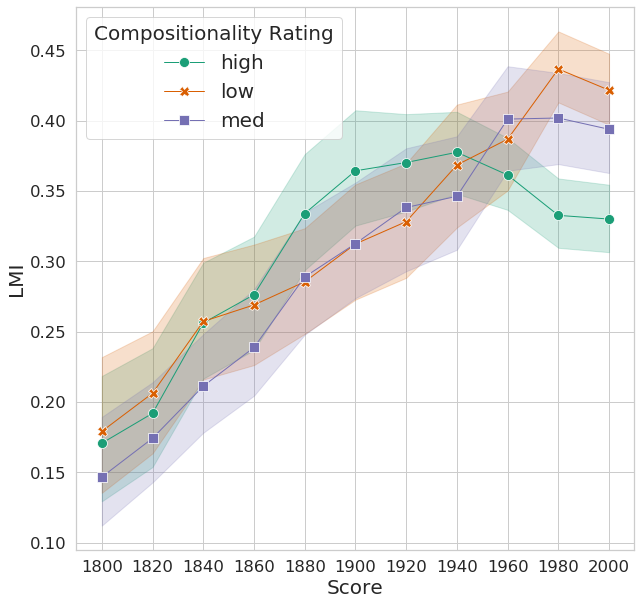

In [22]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_lmi_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("LMI", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('LMI_merged_new.png')

In [23]:
llr_df=features.set_index(["modifier", "head"])[llr_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
llr_df.reset_index(inplace=True)
llr_df['compound']=llr_df['modifier'].str[:-5]+' '+llr_df['head'].str[:-5]
llr_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
llr_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in llr_df.columns if 'compound' not in x]
llr_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
llr_df.reset_index(inplace=True)
plot_llr_df=pd.melt(llr_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
llr_df.head()

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.237,0.155,0.065,0.068,4.250,high
1,firing line,0.000,0.000,0.000,0.000,0.000,0.181,0.190,0.167,0.141,0.107,0.128,1.704,low
2,game plan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.078,0.044,0.047,3.828,med
3,application form,0.000,0.000,0.000,0.000,0.226,0.209,0.232,0.173,0.094,0.039,0.042,4.800,high
4,web site,0.824,0.000,0.000,0.000,0.481,0.429,0.405,0.336,0.212,0.083,0.077,3.786,med


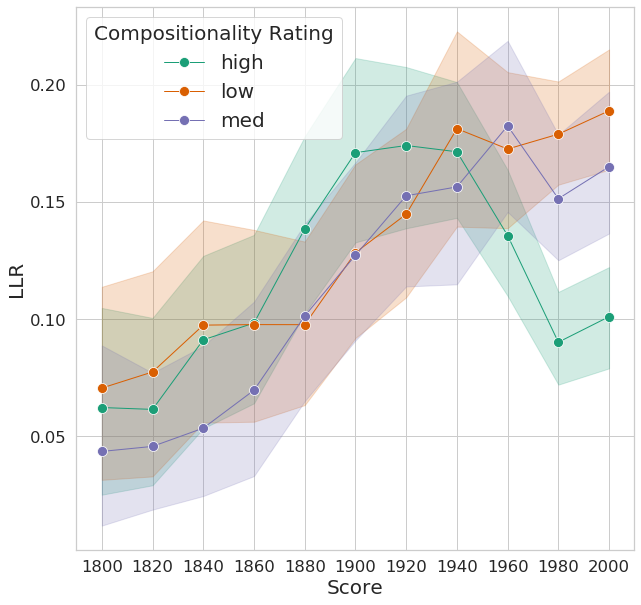

In [24]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_llr_df,palette="Dark2", marker='o',linewidth=1,dashes=False)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("LLR", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('LLR_merged_new.png')

In [25]:
ppmi_df=features.set_index(["modifier", "head"])[ppmi_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
ppmi_df.reset_index(inplace=True)
ppmi_df['compound']=ppmi_df['modifier'].str[:-5]+' '+ppmi_df['head'].str[:-5]
ppmi_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
ppmi_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in ppmi_df.columns if 'compound' not in x]
ppmi_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
ppmi_df.reset_index(inplace=True)
plot_ppmi_df=pd.melt(ppmi_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
ppmi_df.head()

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.333,0.253,0.153,0.147,4.250,high
1,firing line,0.000,0.000,0.000,0.000,0.000,0.272,0.282,0.256,0.235,0.217,0.227,1.704,low
2,game plan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.157,0.119,0.117,3.828,med
3,application form,0.000,0.000,0.000,0.000,0.323,0.304,0.329,0.263,0.177,0.111,0.108,4.800,high
4,web site,0.892,0.000,0.000,0.000,0.597,0.539,0.513,0.438,0.318,0.180,0.159,3.786,med


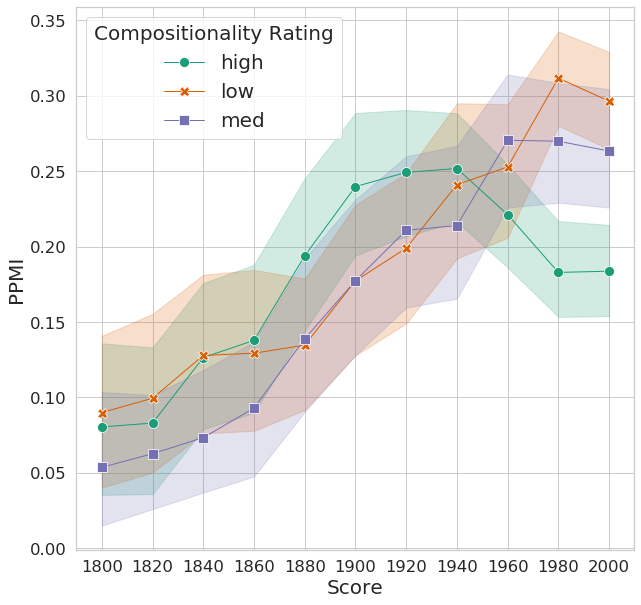

In [26]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_ppmi_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("PPMI", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('PPMI_merged_new.png')

In [27]:
sim_bw_constituents_df=features.set_index(["modifier", "head"])[sim_bw_constituents_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
sim_bw_constituents_df.reset_index(inplace=True)
sim_bw_constituents_df['compound']=sim_bw_constituents_df['modifier'].str[:-5]+' '+sim_bw_constituents_df['head'].str[:-5]
sim_bw_constituents_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
sim_bw_constituents_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in sim_bw_constituents_df.columns if 'compound' not in x]
sim_bw_constituents_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
sim_bw_constituents_df.reset_index(inplace=True)
plot_sim_bw_constituents_df=pd.melt(sim_bw_constituents_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
sim_bw_constituents_df.head()

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.172,0.168,0.169,0.219,0.199,0.199,0.185,0.187,0.278,0.280,0.284,4.250,high
1,firing line,0.172,0.168,0.169,0.219,0.199,0.196,0.179,0.180,0.279,0.290,0.283,1.704,low
2,game plan,0.172,0.168,0.169,0.219,0.199,0.199,0.185,0.186,0.279,0.282,0.283,3.828,med
3,application form,0.172,0.168,0.169,0.219,0.203,0.205,0.189,0.192,0.284,0.305,0.284,4.800,high
4,web site,0.414,0.168,0.169,0.219,0.418,0.418,0.404,0.420,0.481,0.323,0.310,3.786,med


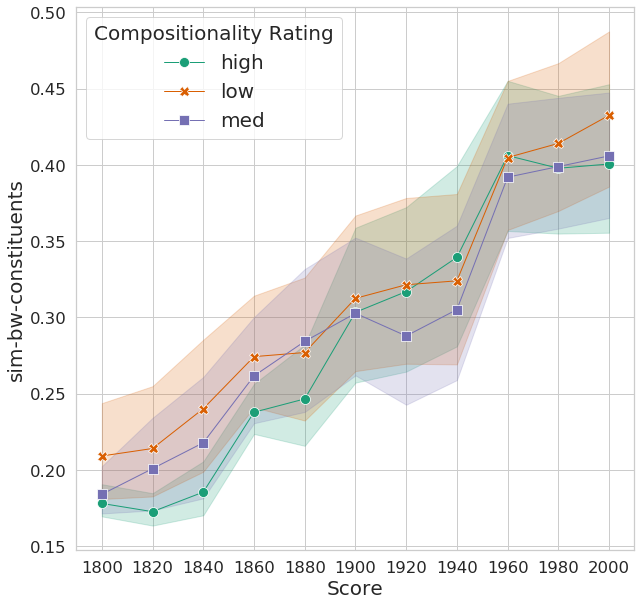

In [28]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_sim_bw_constituents_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("sim-bw-constituents", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('sim-bw-const_merged_new.png')

In [29]:
sim_with_head_df=features.set_index(["modifier", "head"])[sim_with_head_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
sim_with_head_df.reset_index(inplace=True)
sim_with_head_df['compound']=sim_with_head_df['modifier'].str[:-5]+' '+sim_with_head_df['head'].str[:-5]
sim_with_head_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
sim_with_head_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in sim_with_head_df.columns if 'compound' not in x]
sim_with_head_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
sim_with_head_df.reset_index(inplace=True)
plot_sim_with_head_df=pd.melt(sim_with_head_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
sim_with_head_df.head()

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.509,0.531,0.512,0.501,0.518,0.517,0.524,0.685,0.655,0.663,0.660,4.250,high
1,firing line,0.509,0.531,0.512,0.501,0.518,0.725,0.738,0.743,0.713,0.720,0.718,1.704,low
2,game plan,0.509,0.531,0.512,0.501,0.518,0.517,0.524,0.524,0.431,0.445,0.441,3.828,med
3,application form,0.509,0.531,0.512,0.501,0.387,0.419,0.506,0.505,0.483,0.548,0.418,4.800,high
4,web site,0.509,0.531,0.512,0.501,0.521,0.514,0.522,0.526,0.524,0.551,0.553,3.786,med


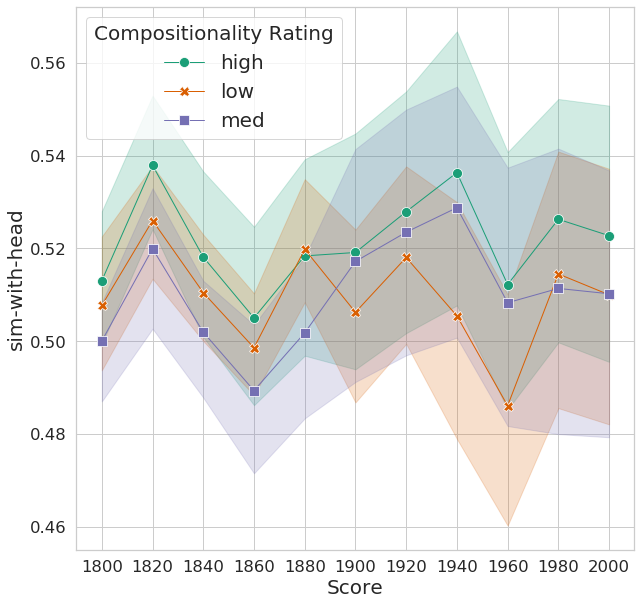

In [30]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_sim_with_head_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("sim-with-head", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('sim-with-head_merged_new.png')

In [31]:
sim_with_modifier_df=features.set_index(["modifier", "head"])[sim_with_modifier_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
sim_with_modifier_df.reset_index(inplace=True)
sim_with_modifier_df['compound']=sim_with_modifier_df['modifier'].str[:-5]+' '+sim_with_modifier_df['head'].str[:-5]
sim_with_modifier_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
sim_with_modifier_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in sim_with_modifier_df.columns if 'compound' not in x]
sim_with_modifier_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
sim_with_modifier_df.reset_index(inplace=True)
plot_sim_with_modifier_df=pd.melt(sim_with_modifier_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
sim_with_modifier_df.head()

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.509,0.531,0.512,0.501,0.518,0.517,0.524,0.685,0.655,0.663,0.660,4.250,high
1,firing line,0.509,0.531,0.512,0.501,0.518,0.725,0.738,0.743,0.713,0.720,0.718,1.704,low
2,game plan,0.509,0.531,0.512,0.501,0.518,0.517,0.524,0.524,0.431,0.445,0.441,3.828,med
3,application form,0.509,0.531,0.512,0.501,0.387,0.419,0.506,0.505,0.483,0.548,0.418,4.800,high
4,web site,0.509,0.531,0.512,0.501,0.521,0.514,0.522,0.526,0.524,0.551,0.553,3.786,med


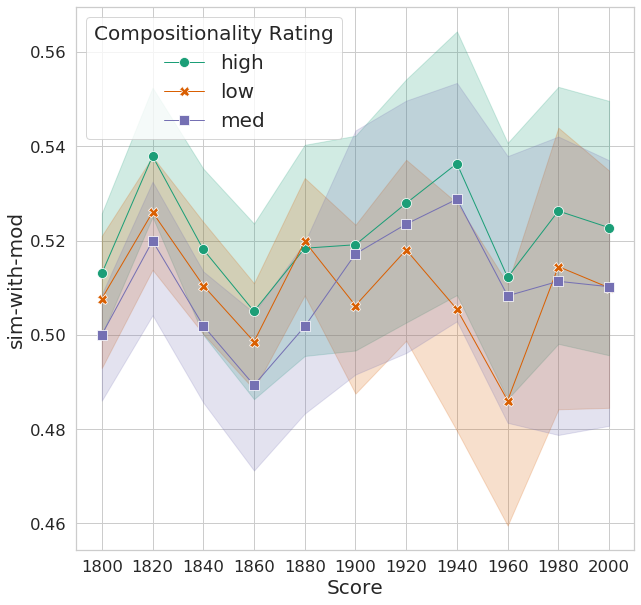

In [32]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_sim_with_modifier_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("sim-with-mod", fontsize=20)
g.legend(title='Compositionality Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('sim-with-mod_merged_new.png')

In [33]:
compounds=pd.read_pickle("../../datasets/compounds_CompoundAgnostic_20_20_300.pkl")
compounds.head()

common     0      1      2      3  \
modifier head        time                                                  
'_noun   a'isha_noun 1980  '_noun a'isha_noun 0.084  0.021 -0.076 -0.007   
                     2000  '_noun a'isha_noun 0.096  0.022 -0.089 -0.013   
         a_noun      1880       '_noun a_noun 0.083 -0.027  0.011  0.021   
                     1900       '_noun a_noun 0.098 -0.009 -0.042  0.030   
                     1920       '_noun a_noun 0.230 -0.123  0.103 -0.019   

                               4      5      6      7      8  ...    290  \
modifier head        time                                     ...          
'_noun   a'isha_noun 1980 -0.000  0.020 -0.044 -0.068  0.042  ... -0.039   
                     2000  0.013  0.028 -0.048 -0.065  0.045  ... -0.036   
         a_noun      1880  0.006  0.006  0.006 -0.026 -0.021  ...  0.003   
                     1900  0.029  0.013  0.010 -0.039 -0.005  ...  0.024   
                     1920  0.067 -0.023  0.014  0.022 -0.053  ...  0.020   

                             291    292    293    294    295    296    297  \
modifier head        time                                                    
'_noun   a'isha_noun 1980  0.112  0.012 -0.155  0.003 -0.024  0.027 -0.025   
                     2000  0.119  0.014 -0.158  0.000 -0.025  0.027 -0.023   
         a_noun      1880 -0.017  0.014  0.008 -0.031  0.016  0.015 -0.008   
                     1900 -0.021  0.030 -0.023  0.034  0.016 -0.003 -0.031   
                     1920  0.032 -0.010 -0.036  0.034 -0.029  0.009 -0.014   

                             298   299  
modifier head        time               
'_noun   a'isha_noun 1980  0.048 0.024  
                     2000  0.059 0.013  
         a_noun      1880  0.007 0.057  
                     1900 -0.002 0.061  
                     1920 -0.016 0.016  

[5 rows x 301 columns]

In [34]:
merge_df_aware=reddy_comp[['modifier','head','compound_rating']].merge(compounds.drop(['common'],axis=1).reset_index(),on=['modifier','head'],how='inner')
merge_df_aware.set_index(["modifier", "head",'time','compound_rating'], inplace = True)
merge_df_aware.info()
merge_df_aware.head()

NameError: name 'reddy_comp' is not defined

In [157]:
def cosine(row1,row2):
    if row1.name[:-2]!=row2.name[:-2]:
        return np.nan
    else:
        denom1=np.sqrt(np.sum(np.square(row1)))
        denom2=np.sqrt(np.sum(np.square(row2)))
        num=np.sum(row1*row2)
        return num/(denom1*denom2)

In [159]:
cosine(merge_df_aware.iloc[2-1],merge_df_aware.iloc[2])

0.770934994171902

In [160]:
cosine_compound_agnostic=[np.nan]
for i in range(1,merge_df_aware.shape[0]):
    cosine_compound_agnostic.append(cosine(merge_df_aware.iloc[i-1],merge_df_aware.iloc[i]))

In [171]:
merge_df_aware['compound_cosine']=cosine_compound_agnostic
compound_df=pd.pivot_table(merge_df_aware.reset_index(), values = 'compound_cosine', index=['modifier','head','compound_rating'], columns = 'time')
compound_df.head()

,,time,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
modifier,head,compound_rating,,,,,,,,,,,,,,,,,,,,,
acid_noun,test_noun,low,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0.950,1.000,0.998,0.982,0.977,0.997,0.976,0.985,0.868,0.980
application_noun,form_noun,high,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0.993,0.992,0.990,0.992,0.995,0.997,0.997,0.990,0.995,0.994
balance_noun,sheet_noun,med,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0.995,0.997,0.999,0.998,0.997,0.997,0.997,0.998,0.999,0.996
bank_noun,account_noun,high,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0.992,0.992,0.997,0.995,0.992,0.998,0.996,0.999,0.998,0.997
blame_noun,game_noun,med,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0.760,0.840,0.965,0.906,0.933,0.975,0.830,0.889,0.994,0.976


In [162]:
compound_df.reset_index(inplace=True)
compound_df['compound']=compound_df['modifier'].str[:-5]+' '+compound_df['head'].str[:-5]
compound_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_compound_df=plot_compound_df.loc[plot_compound_df['compound'].isin(selected_compounds)]
#compound_df.set_index('compound',inplace=True)
#plot_compound_df=plot_compound_df[plot_compound_df.columns[10:]]
plot_compound_df=pd.melt(compound_df,id_vars=['compound','compound_rating'],
                        value_vars=list(range(1801,2009,1)))
plot_compound_df

,compound,compound_rating,time,value
0,acid test,low,1801,nan
1,application form,high,1801,nan
2,balance sheet,med,1801,nan
3,bank account,high,1801,nan
4,blame game,med,1801,nan
5,brick wall,med,1801,nan
6,call center,high,1801,nan
7,car park,high,1801,nan
8,case study,med,1801,nan
9,cash cow,low,1801,nan


(1900, 2009)

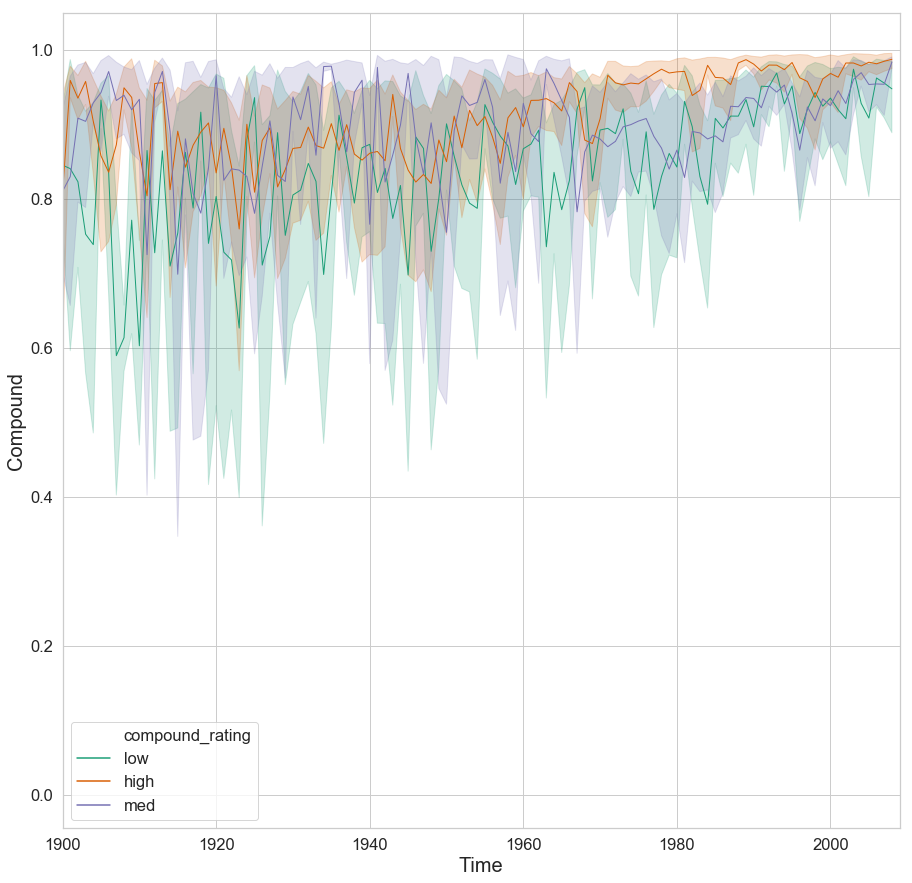

In [168]:
plt.figure(figsize=(15,15))
g=sns.lineplot(x="time", y="value", hue="compound_rating",style="compound_rating",data=plot_compound_df,palette="Dark2",linewidth=1,dashes=False)#,err_style="bars", ci=68)
g.set_xlabel("Time", fontsize=20)
g.set_ylabel("Compound", fontsize=20)
#g.legend(title='Compound Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
g.set_xlim(1900, 2009)

In [ ]:
merge_df_aware_heads=features[['modifier','head']].merge(heads.reset_index(),on=['head'],how='inner')
merge_df_aware_heads.set_index(["modifier", "head",'time'], inplace = True)
merge_df_aware_heads.head()

In [88]:
cosine_head_agnostic=[np.nan]
for i in range(1,merge_df_aware_heads.shape[0]):
    cosine_head_agnostic.append(cosine(merge_df_aware_heads.iloc[i-1],merge_df_aware_heads.iloc[i]))

In [91]:
merge_df_aware_heads['head_cosine']=cosine_head_agnostic
head_df=pd.pivot_table(merge_df_aware_heads.reset_index(), values = 'head_cosine', index=['modifier','head'], columns = 'time')
head_df

,time,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000
modifier,head,,,,,,,,,,,,,,,,,,,,
acid_noun,test_noun,0.989,0.972,0.956,0.957,0.919,0.923,0.713,0.823,0.657,0.806,0.792,0.785,0.989,0.963,0.989,0.994,0.995,0.990,0.990,0.995
agony_noun,aunt_noun,0.531,0.645,0.846,0.833,0.905,0.870,0.874,0.448,0.260,0.729,0.865,0.997,0.998,0.989,0.994,0.857,0.894,0.929,0.708,0.715
application_noun,form_noun,0.916,0.906,0.875,0.925,0.853,0.924,0.949,0.949,0.972,0.996,0.788,0.989,0.957,0.991,0.996,0.992,0.984,0.989,0.986,0.994
balance_noun,sheet_noun,0.790,0.862,0.977,0.981,0.991,0.997,0.997,0.998,0.998,0.997,0.999,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
bank_noun,account_noun,0.976,0.860,0.877,0.975,0.967,0.846,0.879,0.917,0.961,0.899,0.968,0.980,0.979,0.993,0.967,0.970,0.965,0.945,0.989,0.980
blame_noun,game_noun,0.772,0.909,0.899,0.855,0.845,0.773,0.394,0.571,0.839,0.805,0.832,0.961,0.970,0.989,0.986,0.979,0.991,0.990,0.991,0.984
brass_noun,ring_noun,0.856,0.911,0.936,0.952,0.975,0.987,0.989,0.968,0.980,0.971,0.969,0.994,0.972,0.983,0.995,0.996,0.962,0.944,0.990,0.955
brick_noun,wall_noun,0.995,0.989,0.985,0.994,0.993,0.995,0.993,0.990,0.993,0.994,0.971,0.988,0.992,0.996,0.971,0.985,0.991,0.999,0.984,0.991
call_noun,center_noun,0.211,0.021,0.758,0.203,0.680,0.823,0.913,0.970,0.957,0.976,0.976,0.978,0.983,0.927,0.875,0.933,0.909,0.986,0.985,0.981


In [92]:
plot_head_df=head_df.reset_index()
plot_head_df['compound']=plot_head_df['modifier'].str[:-5]+' '+plot_head_df['head'].str[:-5]
plot_head_df.drop(['modifier','head'],axis=1,inplace=True)
plot_head_df.set_index('compound',inplace=True)
plot_head_df

time,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000
compound,,,,,,,,,,,,,,,,,,,,
acid test,0.989,0.972,0.956,0.957,0.919,0.923,0.713,0.823,0.657,0.806,0.792,0.785,0.989,0.963,0.989,0.994,0.995,0.990,0.990,0.995
agony aunt,0.531,0.645,0.846,0.833,0.905,0.870,0.874,0.448,0.260,0.729,0.865,0.997,0.998,0.989,0.994,0.857,0.894,0.929,0.708,0.715
application form,0.916,0.906,0.875,0.925,0.853,0.924,0.949,0.949,0.972,0.996,0.788,0.989,0.957,0.991,0.996,0.992,0.984,0.989,0.986,0.994
balance sheet,0.790,0.862,0.977,0.981,0.991,0.997,0.997,0.998,0.998,0.997,0.999,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
bank account,0.976,0.860,0.877,0.975,0.967,0.846,0.879,0.917,0.961,0.899,0.968,0.980,0.979,0.993,0.967,0.970,0.965,0.945,0.989,0.980
blame game,0.772,0.909,0.899,0.855,0.845,0.773,0.394,0.571,0.839,0.805,0.832,0.961,0.970,0.989,0.986,0.979,0.991,0.990,0.991,0.984
brass ring,0.856,0.911,0.936,0.952,0.975,0.987,0.989,0.968,0.980,0.971,0.969,0.994,0.972,0.983,0.995,0.996,0.962,0.944,0.990,0.955
brick wall,0.995,0.989,0.985,0.994,0.993,0.995,0.993,0.990,0.993,0.994,0.971,0.988,0.992,0.996,0.971,0.985,0.991,0.999,0.984,0.991
call center,0.211,0.021,0.758,0.203,0.680,0.823,0.913,0.970,0.957,0.976,0.976,0.978,0.983,0.927,0.875,0.933,0.909,0.986,0.985,0.981


<Figure size 720x720 with 0 Axes>

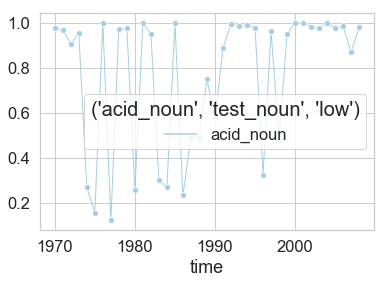

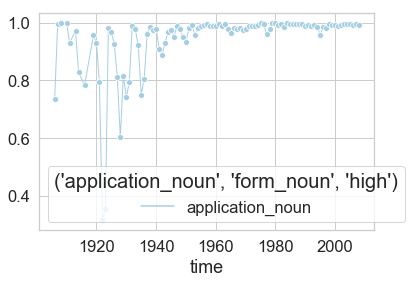

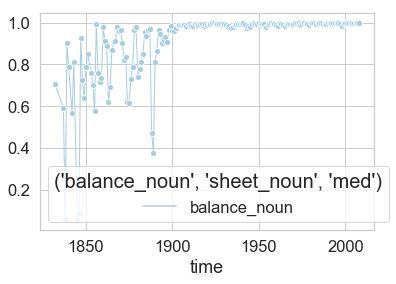

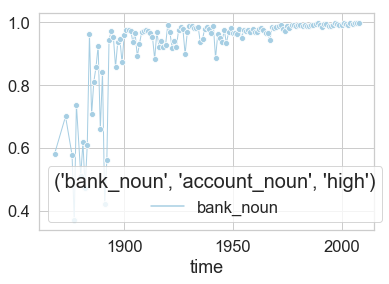

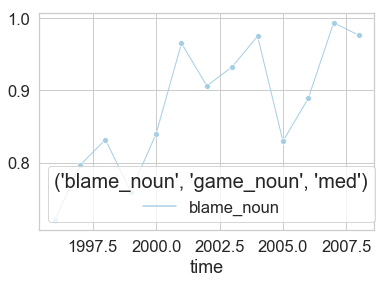

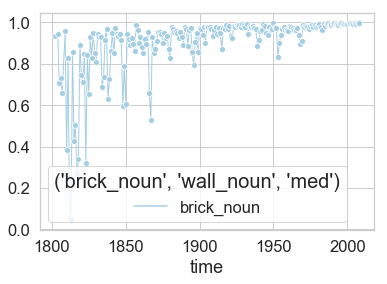

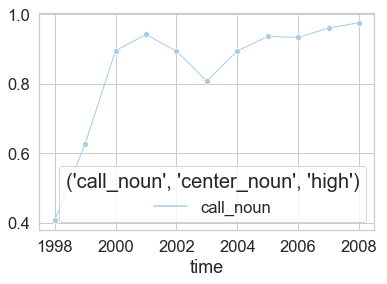

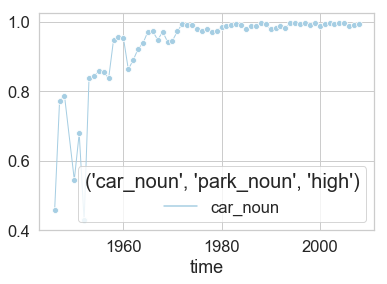

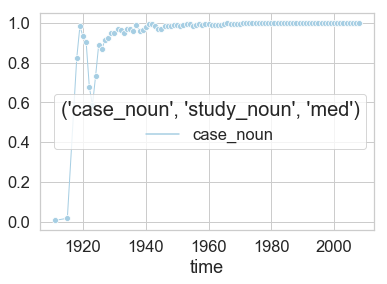

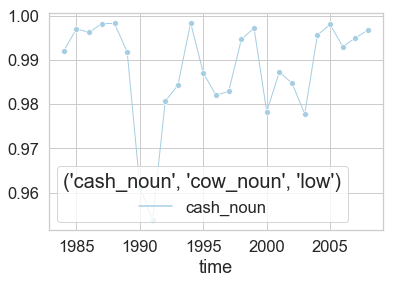

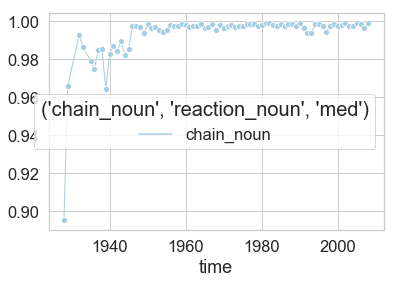

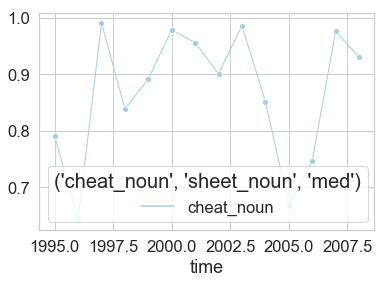

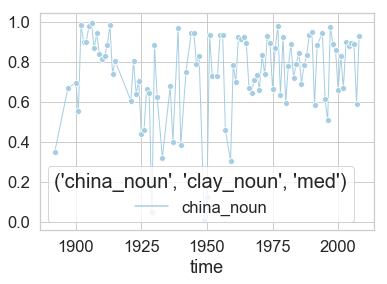

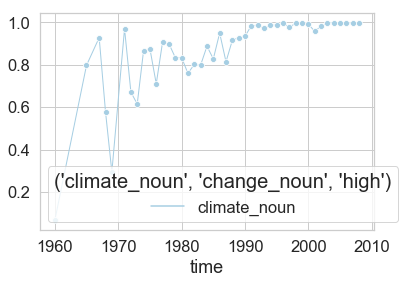

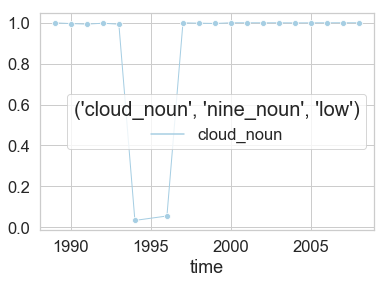

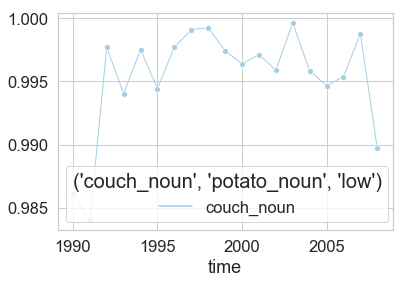

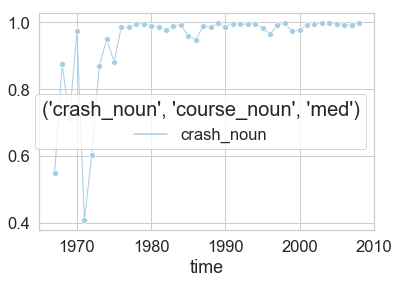

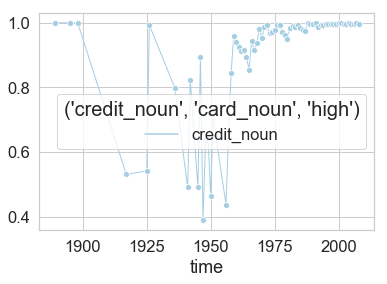

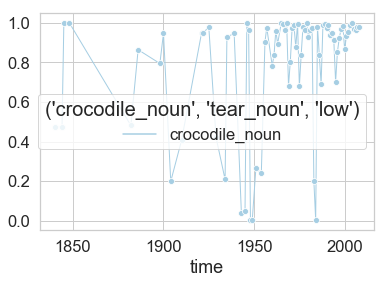

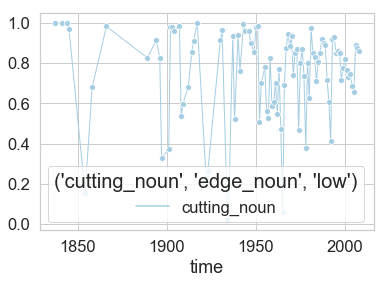

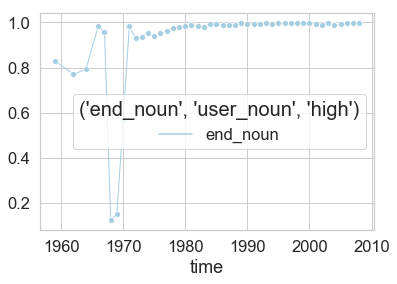

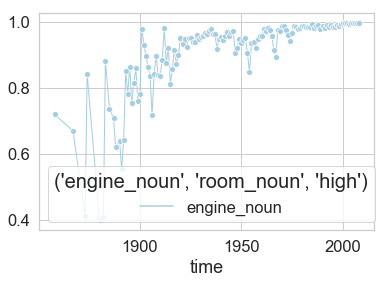

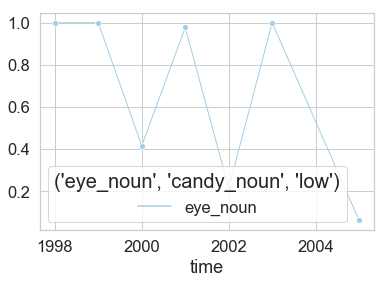

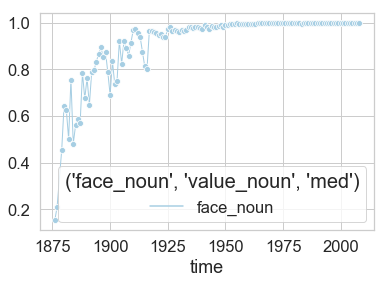

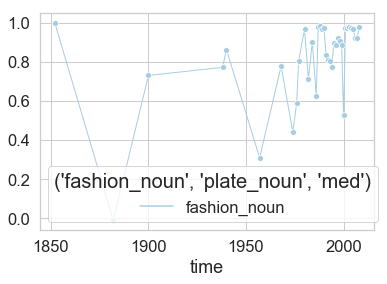

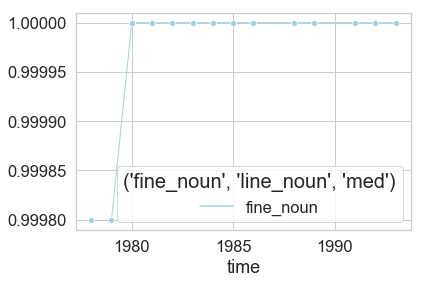

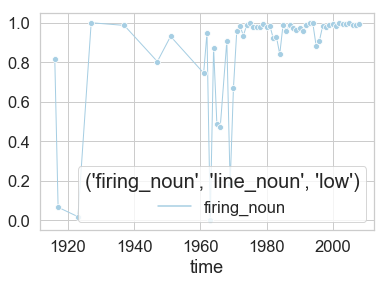

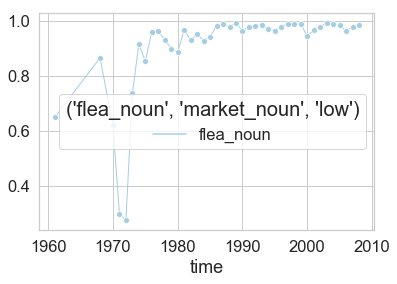

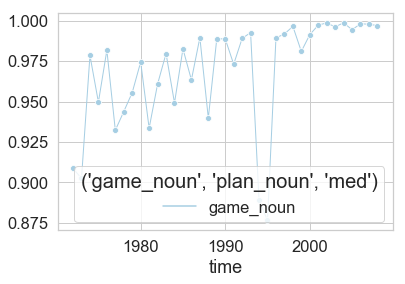

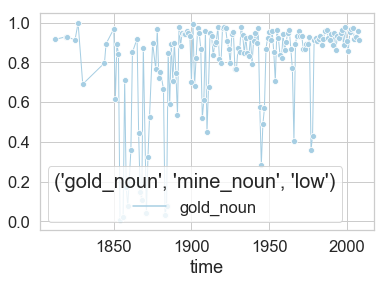

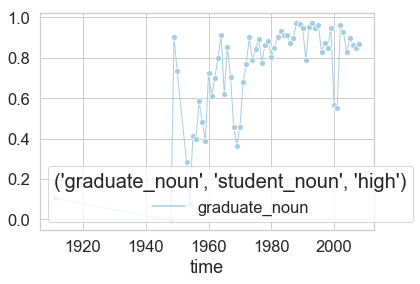

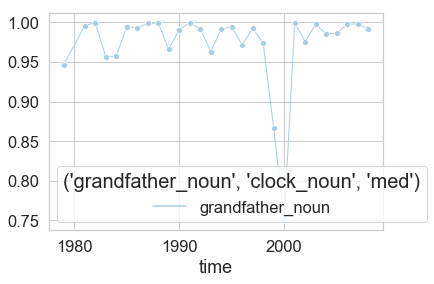

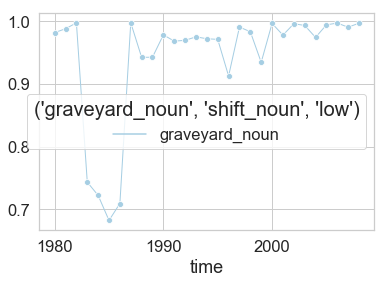

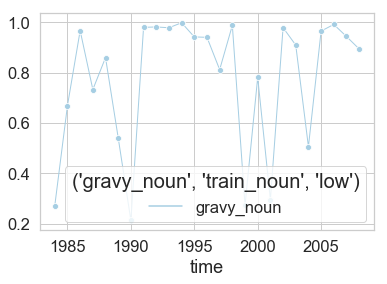

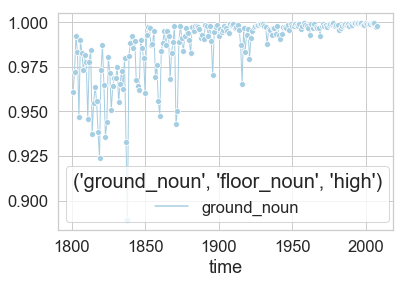

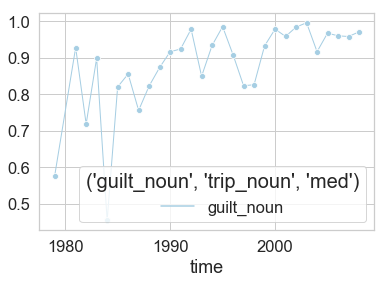

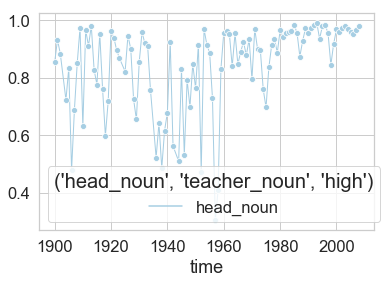

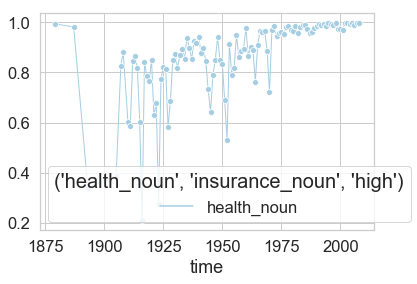

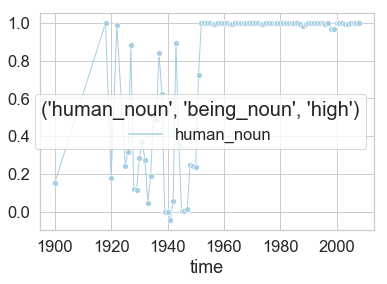

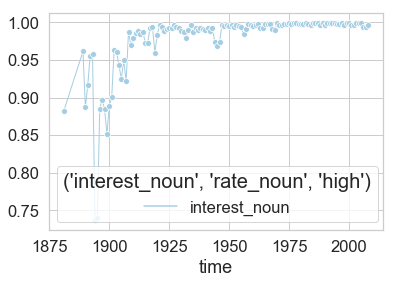

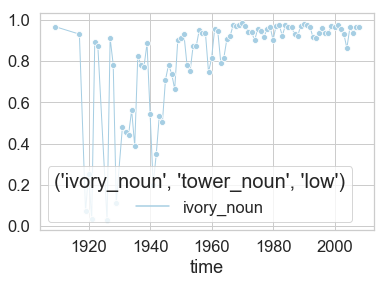

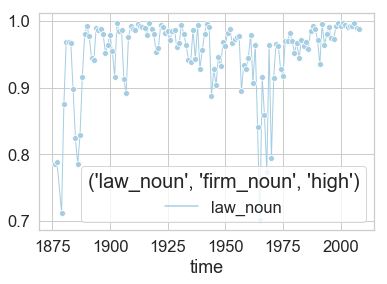

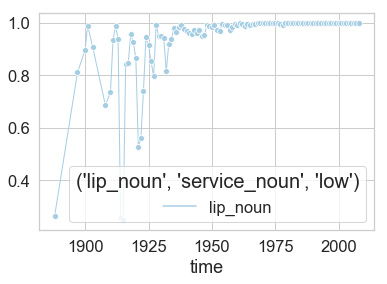

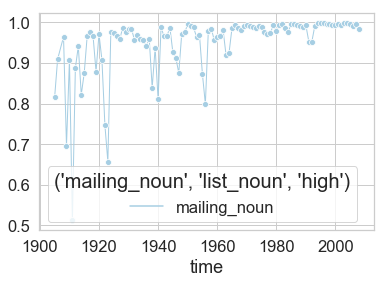

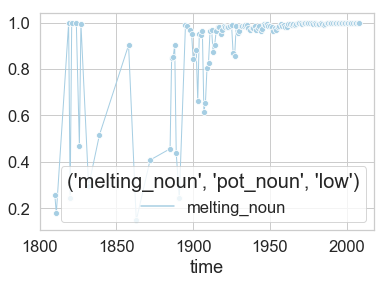

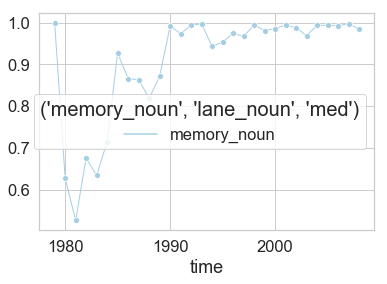

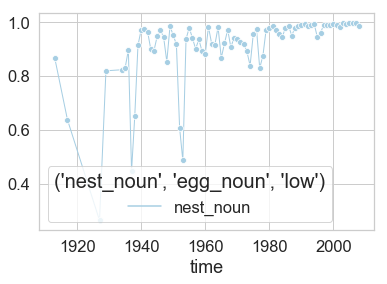

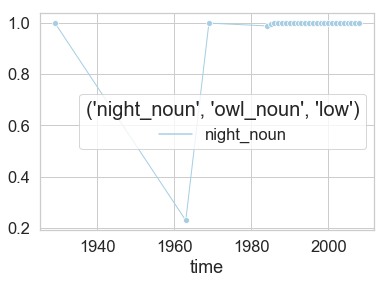

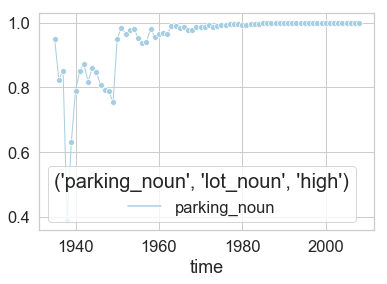

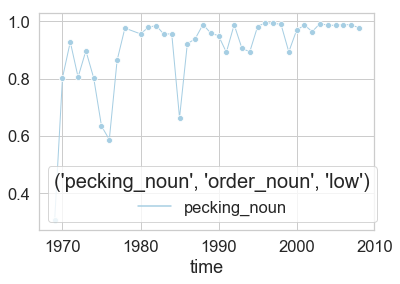

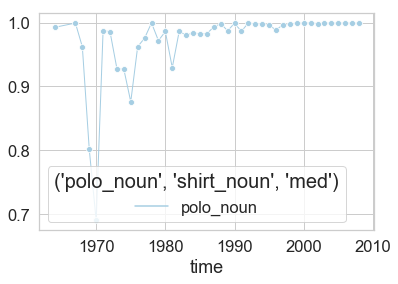

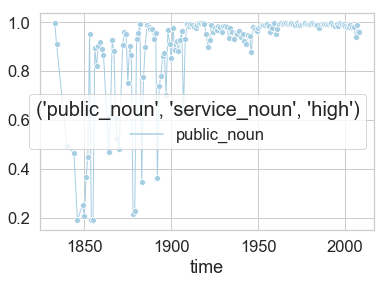

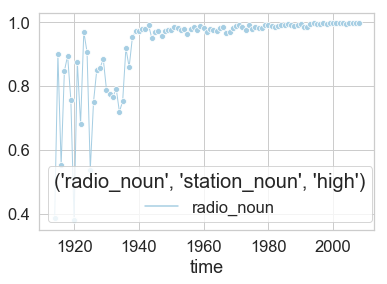

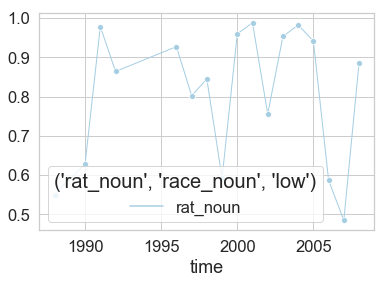

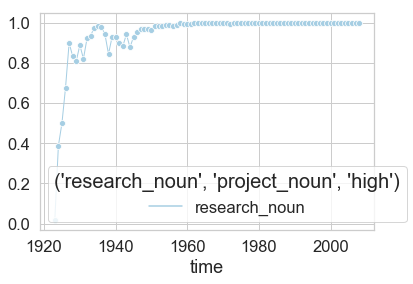

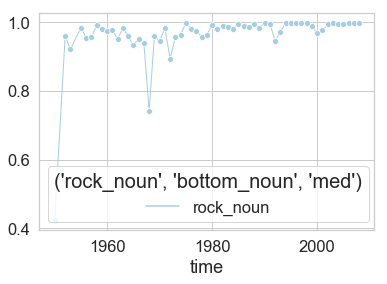

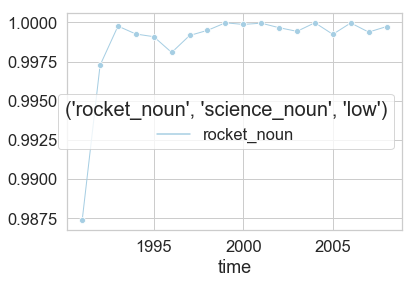

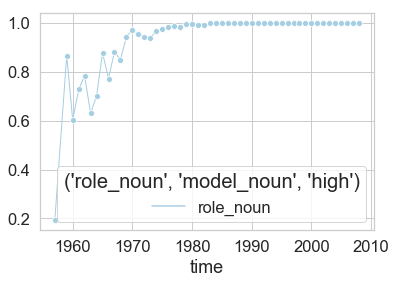

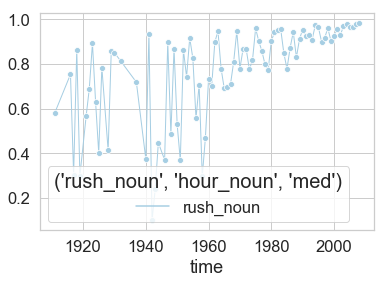

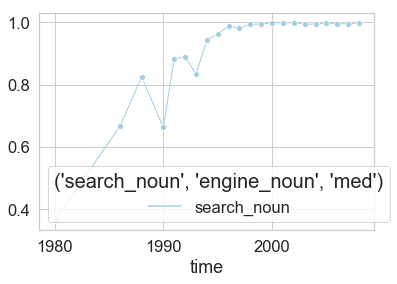

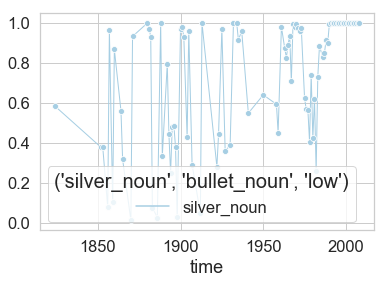

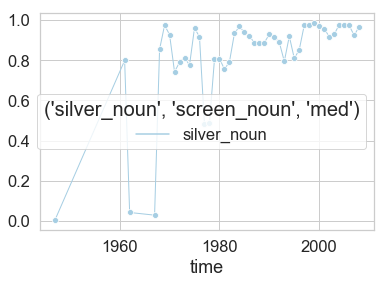

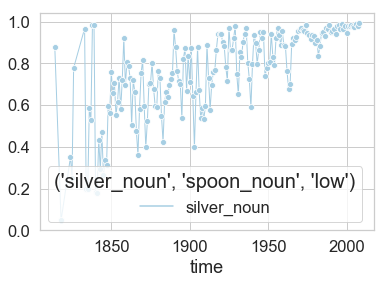

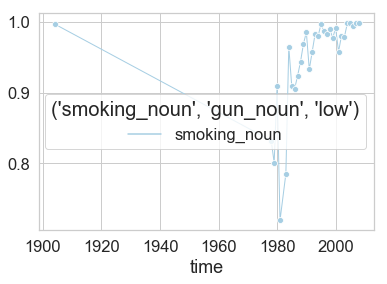

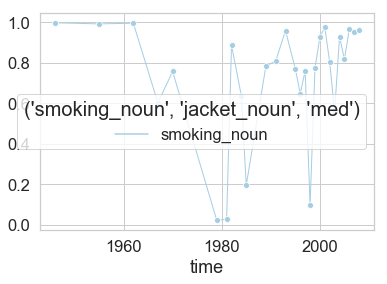

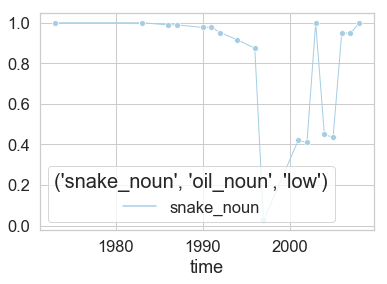

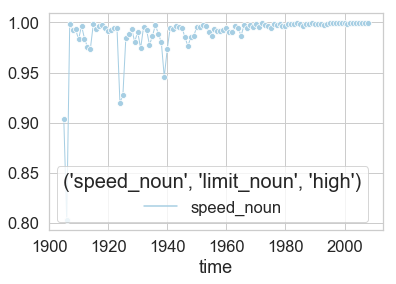

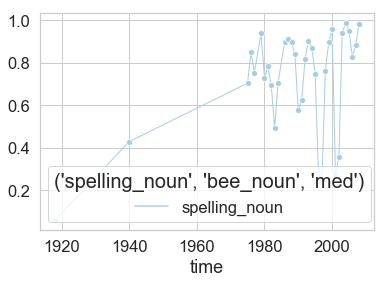

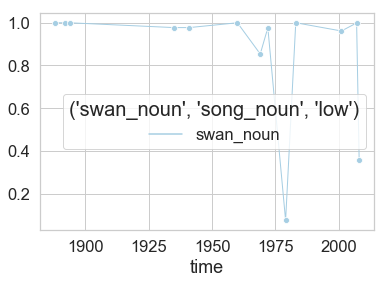

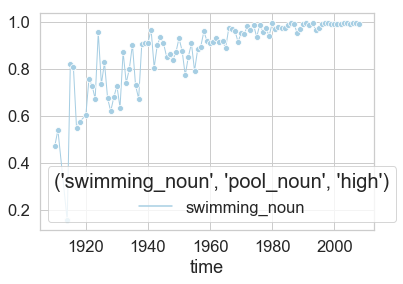

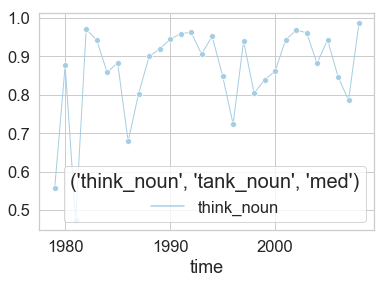

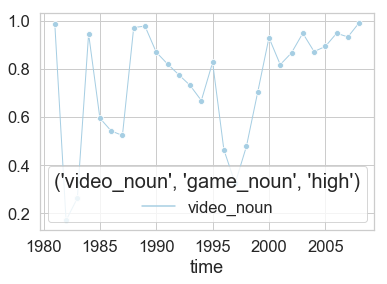

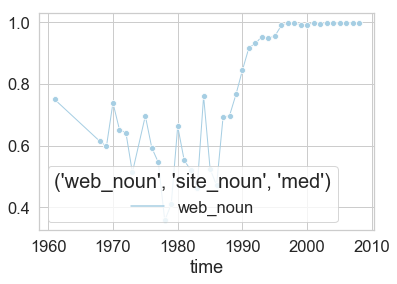

In [181]:
plt.figure(figsize=(10,10))
for i in range(0,compound_df.shape[0]):
    
    plt.figure()
    g=sns.lineplot(data=compound_df.iloc[i].to_frame(), palette="Paired", marker='o',linewidth=1,dashes=False)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
    g.legend(title=compound_df.iloc[i].name, title_fontsize=20)

#g.set(ylim=(-150, 150))

In [ ]:
plt.figure(figsize=(10,10))
g=sns.lineplot(data=plot_lmi_df.sample(n=10,random_state=1001).transpose(), palette="Paired", marker='o',linewidth=1,dashes=False)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#g.set(ylim=(-150, 150))